<a href="https://colab.research.google.com/github/ggonzalesd/3DReconstruction/blob/main/MachineLearning3dReconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install binvox trimesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [361]:
import numpy as np
#import binvox
import trimesh
import matplotlib.pyplot as plt
import random
#import keras
#print('Keras version:', keras.__version__)

In [2]:
!curl https://raw.githubusercontent.com/ggonzalesd/3DReconstruction/main/dataset.npy > dataset.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.7M  100 30.7M    0     0   181k      0  0:02:53  0:02:53 --:--:-- 2928k10:32  0:00:39  0:09:53 78517.7M    7 2398k    0     0  45912      0  0:11:42  0:00:53  0:10:49 493827310k    0     0  56491      0  0:09:30  0:02:12  0:07:18 62385


In [3]:
dataset = np.load("dataset.npy", allow_pickle=True).item()

In [4]:
models_train, models_test = dataset['train'], dataset['test']

In [5]:
models_train_x = models_train['x']
models_train_y = models_train['y']
models_test_x = models_test['x']
models_test_y = models_test['y']

In [359]:
index = random.randint(0, len(models_train_x)-1)
model = models_train_x[index]
model_fractured = models_train_x[index]
model_recontruct = models_train_y[index]
index

151

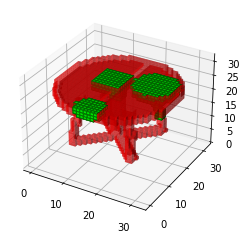

In [360]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(model_fractured, facecolors='red', alpha=0.5)
ax.voxels(model_recontruct, facecolors='lime', edgecolors='green')
plt.show()

In [13]:
models_train_x.shape

(392, 32, 32, 32)

In [364]:
for i in [185, 171, 18, 13, 284, 276, 152, 238]:
    model_fractured = models_train_x[i]
    mesh = trimesh.voxel.ops.matrix_to_marching_cubes(matrix=model_fractured, pitch=1.0)
    mesh.merge_vertices()
    mesh.remove_duplicate_faces()
    mesh.apply_scale(scaling=0.25)
    trimesh.repair.fill_holes(mesh)
    trimesh.repair.fix_inversion(mesh)
    trimesh.repair.fix_winding(mesh)

    trimesh.exchange.export.export_mesh(mesh=mesh, file_obj=f"model/mesh_{i}.stl", file_type='stl')